# Predicting an Election Outcome with Cultural, Socioeconomic, and Physical Variables

In [97]:
# Import the necessary libraries
import pandas as pd
import numpy as np
import os
from sklearn.model_selection import train_test_split

In [68]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

In [93]:
# Decision Tree unique libs
from sklearn.tree import export_graphviz
from six import StringIO  
from IPython.display import Image  
import pydotplus

In [3]:
# Load all raw datasets first: 
raw_harvard_election_returns_main = pd.read_csv('./raw_data/HarvardData_countypres_2000-2020.csv')
raw_nytimes_dataset = pd.read_csv('./raw_data/NYTimes_covidcasedata.csv')
raw_facebook_social_connectedness_index = pd.read_csv('./raw_data/Facebook_Cornell_ERS_SocialConnectednessIndex.csv')
raw_landareas_counties = pd.read_csv('./raw_data/AgriCensus_LandAreas.csv')
raw_ers_detailed_labor = pd.read_csv('./raw_data/ERS_RurAtlas_DetailedLabor.csv')
raw_ers_migration = pd.read_csv('./raw_data/ERS_RurAtlas_Migration.csv')
raw_ers_urban_rural = pd.read_csv('./raw_data/ERS_RurAtlas_UrbanRuralClassification.csv')
raw_fcc_health_and_broadband = pd.read_csv('./raw_data/FCC_Health_and_Broadband.csv')
raw_harvard_streets_and_intersections = pd.read_csv('./raw_data/HarvardData_streets_intersections.csv')
raw_noaa_storm_events = pd.read_csv('./raw_data/NOAA_StormEvent_Fatalities_2016.csv')
raw_openicpsr_crime = pd.read_csv('./raw_data/OPENICPSR_Crime.csv')
raw_pennstateagri_social_capital_variables = pd.read_csv('./raw_data/PennState_AgriScienceDept_Religion_and_Social_Capital.csv')

C:\Users\isnek\envs\algo1\lib\site-packages\IPython\core\interactiveshell.py:3169: DtypeWarning: Columns (2,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,36,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,267,269,303,304) have mixed types.Specify dtype option on import or set 

In [6]:
# Begin investigating the raw datasets for dimension reduction
raw_nytimes_dataset.head()

,date,county,state,fips,cases,deaths
0,2020-01-21,Snohomish,Washington,53061.0,1,0.0
1,2020-01-22,Snohomish,Washington,53061.0,1,0.0
2,2020-01-23,Snohomish,Washington,53061.0,1,0.0
3,2020-01-24,Cook,Illinois,17031.0,1,0.0
4,2020-01-24,Snohomish,Washington,53061.0,1,0.0


In [6]:
raw_harvard_election_returns_main.head()

,year,state,state_po,county_name,county_fips,office,candidate,party,candidatevotes,totalvotes,version,mode
0,2000,ALABAMA,AL,AUTAUGA,1001.0,PRESIDENT,AL GORE,DEMOCRAT,4942.0,17208.0,20191203,TOTAL
1,2000,ALABAMA,AL,AUTAUGA,1001.0,PRESIDENT,GEORGE W. BUSH,REPUBLICAN,11993.0,17208.0,20191203,TOTAL
2,2000,ALABAMA,AL,AUTAUGA,1001.0,PRESIDENT,RALPH NADER,GREEN,160.0,17208.0,20191203,TOTAL
3,2000,ALABAMA,AL,AUTAUGA,1001.0,PRESIDENT,OTHER,OTHER,113.0,17208.0,20191203,TOTAL
4,2000,ALABAMA,AL,BALDWIN,1003.0,PRESIDENT,AL GORE,DEMOCRAT,13997.0,56480.0,20191203,TOTAL


In [3]:
raw_facebook_social_connectedness_index.columns
raw_facebook_social_connectedness_index.head()
# Social Index Density within 50 mile, 100 mile and 500 mile radius:

,FIPS,sh050m,sh100m,sh500m,income,migration,birth,death,education,unemployment,election
0,1001,0.206411,0.350840,0.291315,0.397313,0.407286,0.226810,-0.287958,0.653881,-0.056201,0.537613
1,1003,-0.099281,-0.641534,-0.209279,0.551486,1.643524,-0.174324,-0.358580,1.036397,0.052797,0.811953
2,1005,0.359257,0.516236,0.666761,-1.290785,-1.386023,-0.415005,-0.005468,-0.993064,1.687769,-0.866032
3,1007,1.582025,1.260516,0.917058,-0.494129,-0.058211,0.186697,-0.005468,-1.067442,0.652287,0.713348
4,1009,1.582025,1.260516,0.917058,-0.171091,-0.073473,0.226810,0.135776,-0.950562,0.107296,1.531833


In [7]:
raw_landareas_counties.head()

,STATE FIPS,COUNTY FIPS,STATE/TERRITORY NAME,COUNTY NAME,2010 POPULATION,2015 POPULATION,LAND AREA (Sqare Miles)
0,1,1,Alabama,Autauga County,"54,571","55,347",594.436
1,1,3,Alabama,Baldwin County,"182,265","203,709","1,589.784"
2,1,5,Alabama,Barbour County,"27,457","26,489",884.876
3,1,7,Alabama,Bibb County,"22,915","22,583",622.582
4,1,9,Alabama,Blount County,"57,322","57,673",644.776


In [ ]:
raw_bls_unemployment_2014.head(5)

,LAUS_Code,S_Code,C_Code,County,Year,Unnamed: 5,Labor_Force,Employed,Unemployed,Unemp_Rate
0,CN0100100000000,1.0,1.0,"Autauga County, AL",2014.0,NaN,"25,639","24,150","1,489",5.8
1,CN0100300000000,1.0,3.0,"Baldwin County, AL",2014.0,NaN,"86,546","81,265","5,281",6.1
2,CN0100500000000,1.0,5.0,"Barbour County, AL",2014.0,NaN,"8,859","7,930",929,10.5
3,CN0100700000000,1.0,7.0,"Bibb County, AL",2014.0,NaN,"8,573","7,959",614,7.2
4,CN0100900000000,1.0,9.0,"Blount County, AL",2014.0,NaN,"24,571","23,074","1,497",6.1


In [ ]:
raw_ers_detailed_labor.head(2)

,FIPS,State,County,UnempRate2020,PctEmpChange1920,UnempRate2019,PctEmpChange1819,UnempRate2018,UnempRate2017,UnempRate2016,...,NumUnemployed2015,NumUnemployed2014,NumEmployed2014,NumCivLaborforce2014,NumUnemployed2013,NumCivLaborforce2013,NumUnemployed2007,NumEmployed2007,NumCivLaborforce2007,NumCivLaborforce2017
0,0,US,United States,8.1,-6.0,3.7,1.3,3.9,4.4,4.9,...,8285731.0,9617207.0,146318952.0,155936159.0,11457241.0,155362278.0,7034917.0,145156133.0,152191050.0,160214378.0
1,1000,AL,Alabama,5.9,-3.2,3.0,2.3,3.9,4.6,5.9,...,131852.0,146010.0,2018705.0,2164715.0,159274.0,2172102.0,88418.0,2092030.0,2180448.0,2172455.0


In [ ]:
raw_ers_migration.head(2)

,FIPS,State,County,PopChangeRate1819,PopChangeRate1019,TotalPopEst2019,NetMigrationRate1019,NaturalChangeRate1019,Net_International_Migration_Rate_2010_2019,PopChangeRate0010,...,TotalPopEst2014,TotalPopEst2011,Net_International_Migration_2010_2019,NaturalChange1019,TotalPopEst2015,TotalPopEst2016,TotalPopEst2017,NetMigration1019,TotalPopEst2018,TotalPopEstBase2010
0,0,US,United States,0.475,6.116,328239523,2.485,3.631,2.485,9.71,...,318301008,311556874,7685444.0,11232413.0,320635163,322941311,324985539,7685444.0,326687501,308758105
1,1000,AL,Alabama,0.317,2.461,4903185,1.059,1.402,0.809,7.48,...,4841799,4799069,38731.0,67083.0,4852347,4863525,4874486,50665.0,4887681,4780125


In [ ]:
raw_ers_urban_rural.head(2)

,FIPStxt,State,County,RuralUrbanContinuumCode2013,UrbanInfluenceCode2013,RuralUrbanContinuumCode2003,UrbanInfluenceCode2003,Metro2013,Nonmetro2013,Micropolitan2013,...,FarmDependent2003,ManufacturingDependent2000,LowEducation2000,RetirementDestination2000,PersistentPoverty2000,Noncore2013,Type_2015_Nonspecialized_NO,Metro_Adjacent2013,PersistentChildPoverty2004,RecreationDependent2000
0,1001,AL,Autauga,2.0,2.0,2.0,2.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,1003,AL,Baldwin,3.0,2.0,4.0,5.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
raw_fcc_health_and_broadband.head(3)

,FID,geography_type,geography_id,geography_desc,submission_cycle,geom,centroid,res_concxns_pct,pctpopwbbacc,pctpopwobbacc,...,Unnamed: 343,Unnamed: 344,Unnamed: 345,Unnamed: 346,Unnamed: 347,Unnamed: 348,Unnamed: 349,Unnamed: 350,Unnamed: 351,Unnamed: 352
0,c2hgis_county.fid--3df29475_17a3fe20314_5ad2,county,21109,Jackson County,2015-09,"MULTIPOLYGON (((-84.205306 37.503062, -84.1994...",POINT (-84.00617164501776 37.41979135091643),3,99.6,0.4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,c2hgis_county.fid--3df29475_17a3fe20314_5ad3,county,37005,Alleghany County,2015-09,MULTIPOLYGON (((-81.3531692825529 36.574724003...,POINT (-81.127710400513 36.49135989086295),4,87.7,12.3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,c2hgis_county.fid--3df29475_17a3fe20314_5ad4,county,13123,Gilmer County,2015-09,"MULTIPOLYGON (((-84.65709799999999 34.728905, ...",POINT (-84.45574304407471 34.69141719651767),5,95.1,4.9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
raw_harvard_streets_and_intersections.head(2)

,county,geoid,area_km,avg_neighbor_degree_avg,avg_weighted_neighbor_degree_avg,circuity_avg,cluster_coeff_avg,cluster_coeff_weighted_avg,degree_centrality_avg,edge_density_km,...,node_count,node_density_km,pagerank_max,pagerank_min,self_loop_proportion,street_density_km,street_length_avg,street_length_total,street_segments_count,streets_per_node_avg
0,Autauga County,1001,1539.614693,2.801244,0.021544,1.095906,0.045214,0.000854,0.001109,2519.774067,...,4315,2.802649,0.000770,0.000035,0.010265,1282.794436,371.521663,1975009.162,5316,2.455156
1,Baldwin County,1003,4117.605847,2.753929,0.026284,1.078592,0.037953,0.000241,0.000254,2772.858997,...,18730,4.548760,0.000203,0.000008,0.015718,1465.780821,254.319386,6035507.677,23732,2.501281


In [ ]:
raw_noaa_storm_events.head(2)

,FAT_YEARMONTH,FAT_DAY,FAT_TIME,FATALITY_ID,EVENT_ID,FATALITY_TYPE,FATALITY_DATE,FATALITY_AGE,FATALITY_SEX,FATALITY_LOCATION,EVENT_YEARMONTH
0,201602,24,0,30075,619440,D,02/24/2016 00:00:00,78.0,M,Outside/Open Areas,201602.0
1,201603,9,0,30181,626789,D,03/09/2016 00:00:00,56.0,M,Outside/Open Areas,201603.0


In [17]:
raw_openicpsr_crime.head(6)

,STCOFIPS,FIPS_ST,FIPS_CTY,YEAR,STUDYNO,EDITION,PART,IDNO,CPOPARST,CPOPCRIM,...,VIOL,PROPERTY,MURDER,RAPE,ROBBERY,AGASSLT,BURGLRY,LARCENY,MVTHEFT,ARSON
0,1001,1,1,2002,ICPSR Study No,"1st ed, August 2004",Crimes-County,1,44959,24424,...,NaN,NaN,0,18,35,48,172,1023,48,13
1,1001,1,1,2003,4360,"1st ed, August 2004",Crimes-County,1,46808,45749,...,NaN,NaN,3,29,34,95,326,1235,107,3
2,1001,1,1,2004,4466,"1st ed, August 2004",Crimes-County,1,47929,45898,...,NaN,NaN,0,11,38,103,358,1162,86,3
3,1001,1,1,2005,4717,"1st ed, August 2004",Crimes-County,1,48917,47669,...,NaN,NaN,0,15,28,67,356,1149,112,1
4,1001,1,1,2006,23780,"1st ed, August 2004",Crimes-County,1,50316,49052,...,NaN,NaN,1,16,49,85,343,1226,94,3
5,1001,1,1,2007,25114,"1st ed, August 2004",Crimes-County,1,52092,50582,...,NaN,NaN,1,14,35,66,393,1194,101,5


In [ ]:
raw_pennstateagri_social_capital_variables.head(3)

,FIPS,County_Name,Religious2014,Civic2014,Business2014,Political2014,Professional2014,Labor2014,Bowling2014,Recreational2014,...,nccs2014,sk2014,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
0,1001.0,"Autauga County, AL",53.0,7.0,3.0,0.0,1.0,4.0,1.0,5.0,...,157.0,-0.631003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1003.0,"Baldwin County, AL",169.0,16.0,9.0,0.0,3.0,1.0,1.0,25.0,...,718.0,-0.555396,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1005.0,"Barbour County, AL",19.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,92.0,-0.891036,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## DATA SOURCE AND DESCRIPTION
Most of the datasets from our multiple sources are descriptive of counties in the United States. One county is one record, in general. 

### WHAT IS THE TARGET VARIABLE?
The target variable is the classification of political leaning.

### WHAT ARE THE PREDICTOR VARIABLES UNDER CONSIDERATION?
The predictor variables are divided into three groups:
#### Cultural
- Urban and Rural Spectrum Classification
- Facebook Social Connectedness Index Per County
- Social Capital Variables from Penn State (including a Religion variable)

#### Physical
- Land Area (for scaling mainly)
- Health Variables
- Broadband
- Streets and Intersections
- Storm Fatalities for 2016

#### Socioeconomic
- Labor and Unemployment
- Migration
- Crime

## DIMENSION REDUCTION AND VARIABLE SELECTION

We have collected too many datasets for each group we want to represent in our model. To simplify, we decided to use Facebook Social Connectedness Index values and Social Capital values to represent cultural variables. Then we chose Labor and Unemployment, Population, and Migration as socioeconomic indicators. If time allows and this selection does not provide the best results, we will revisit the other dropped variables such as broadband, crime, and health. (Note: We might just use streets and intersections for mapping or data visualizations although the street density per land area may also be a good indication of physical accessibility in a given county or a proxy variable for urban/rural classification)

## DATA CLEANING, AGGREGATIONS, AND TRANSFORMATION

### Main Harvard Election Return Data per County

In [16]:
# Begin with Harvard Election Returns at County Level
results = raw_harvard_election_returns_main[raw_harvard_election_returns_main['party'].isin(['DEMOCRAT', 'REPUBLICAN'])]
grpby_cols = ['year', 'state', 'state_po', 'county_name', 'county_fips', 'office',
              'candidate', 'party', 'totalvotes', 'version']
results = results.groupby(grpby_cols, as_index=False).sum()

In [7]:
results['pctvotes'] = results['candidatevotes'] / results['totalvotes']
results['office'] = 'PRESIDENT'  # for consistency

In [8]:
index_cols = ['year', 'state', 'state_po', 'county_name', 'county_fips', 'office']

In [9]:
pivoted_results = pd.pivot_table(results, index=index_cols, values=['pctvotes', 'candidatevotes'], columns=['party']).reset_index()
pivoted_results.columns.name = ''
pivoted_results.columns = [(x[0] + '_' + x[1]).lower() if x[1] != '' else x[0] for x in  pivoted_results.columns.values]
a = pivoted_results['candidatevotes_democrat'] > pivoted_results['candidatevotes_republican']
pivoted_results['winner'] = ['democrat' if x else 'republican' for x in a]
pivoted_results = pivoted_results[['year', 'state', 'county_name', 'county_fips', 'candidatevotes_democrat',
                                   'candidatevotes_republican', 'pctvotes_democrat', 'pctvotes_republican', 'winner']]

In [10]:
pivoted_results.head()

,year,state,county_name,county_fips,candidatevotes_democrat,candidatevotes_republican,pctvotes_democrat,pctvotes_republican,winner
0,2000,ALABAMA,AUTAUGA,1001.0,4942.0,11993.0,0.287192,0.696943,republican
1,2000,ALABAMA,BALDWIN,1003.0,13997.0,40872.0,0.247822,0.723654,republican
2,2000,ALABAMA,BARBOUR,1005.0,5188.0,5096.0,0.499086,0.490236,democrat
3,2000,ALABAMA,BIBB,1007.0,2710.0,4273.0,0.381636,0.601746,republican
4,2000,ALABAMA,BLOUNT,1009.0,4977.0,12667.0,0.276915,0.704779,republican


In [15]:
# Export Election Results
OUTPUT_PATH = 'outputs'
for year in pivoted_results['year'].unique():
    df_temp = pivoted_results[pivoted_results['year'] == year]
    df_temp.to_csv(os.path.join(OUTPUT_PATH, f'results_{year}.csv'), index=False)

### Unemployment

In [17]:
PATH = 'raw_data'
unemployment = pd.read_excel(os.path.join(PATH, 'ERS_Unemployment.xlsx'), header=4)
rates_cols = ['Unemployment_rate_2000',
              'Unemployment_rate_2004',
              'Unemployment_rate_2008',
              'Unemployment_rate_2012',
              'Unemployment_rate_2016',
              'Unemployment_rate_2020']

In [18]:
area_cols = ['State', 'Area_name', 'FIPS_Code']
unemployment_ey = unemployment[area_cols + rates_cols]
unemployment_ey.sample(2)

,State,Area_name,FIPS_Code,Unemployment_rate_2000,Unemployment_rate_2004,Unemployment_rate_2008,Unemployment_rate_2012,Unemployment_rate_2016,Unemployment_rate_2020
814,IA,"Black Hawk County, IA",19013,2.8,4.6,4.1,5.5,4.6,6.2
3225,PR,"Guanica Municipio, PR",72055,15.8,15.8,14.8,24.8,18.1,NaN


In [20]:
# Melt dataset for better form
unemployment_ey_melted = pd.melt(unemployment_ey, 
                                 id_vars=area_cols, 
                                 value_vars=rates_cols, 
                                 value_name='unemployment',
                                 var_name='year')
unemployment_ey_melted['year'] = [x.split('_')[2] for x in unemployment_ey_melted['year']]
unemployment_ey_melted['year'] = unemployment_ey_melted['year'].astype(int)
unemployment_ey_melted.rename(columns={'FIPS_Code': 'county_fips'}, inplace=True)
unemployment_ey_melted = unemployment_ey_melted[['county_fips', 'year', 'unemployment']]
unemployment_ey_melted.sample()

,county_fips,year,unemployment
16599,6059,2020,8.8


In [22]:
# Export unemployment data
for year in unemployment_ey_melted['year'].unique():
    df_temp = unemployment_ey_melted[unemployment_ey_melted['year'] == year]
    df_temp.to_csv(os.path.join(OUTPUT_PATH, f'unemployment_{year}.csv'), index=False)
    

### Population Data

In [23]:
population = pd.read_excel(os.path.join(PATH, 'ERS_PopulationEstimates.xls'), header=2)
population.sample()

,FIPStxt,State,Area_Name,Rural-urban_Continuum Code_2003,Rural-urban_Continuum Code_2013,Urban_Influence_Code_2003,Urban_Influence_Code_2013,Economic_typology_2015,CENSUS_2010_POP,ESTIMATES_BASE_2010,...,R_DOMESTIC_MIG_2019,R_NET_MIG_2011,R_NET_MIG_2012,R_NET_MIG_2013,R_NET_MIG_2014,R_NET_MIG_2015,R_NET_MIG_2016,R_NET_MIG_2017,R_NET_MIG_2018,R_NET_MIG_2019
3068,54053,WV,Mason County,6.0,6.0,5.0,5.0,0.0,27324,27348,...,-4.730795,0.073148,-3.007353,-0.073582,3.167762,-0.40559,-1.628815,-1.190831,0.56014,-4.843433


We obtained the rates for natural increase in population, international migration, domestic migration, and net migration for the years 2012, 2016, and we substituted the value of 2019 for 2020.

In [26]:
years_population = ['2012', '2016', '2019']
rate_nat_inc_cols = ['R_NATURAL_INC_' + str(x) for x in years_population]
rate_int_mig_cols = ['R_INTERNATIONAL_MIG_' + str(x) for x in years_population]
rate_dom_mig_cols = ['R_DOMESTIC_MIG_' + str(x) for x in years_population]
rate_net_mig_cols = ['R_NET_MIG_' + str(x) for x in years_population]

# Create dictionary out of these columns: 
population_dict = {'rate_natural_increase_population': rate_nat_inc_cols,
                   'rate_international_migration': rate_int_mig_cols,
                   'rate_domestic_migration': rate_dom_mig_cols,
                   'rate_net_migration': rate_net_mig_cols}

In [27]:
for key in population_dict.keys():
    cols = population_dict[key]
    temp2 = pd.melt(population[['FIPStxt'] + cols], 
                    id_vars=['FIPStxt'], 
                    value_vars=cols, 
                    value_name=key,
                    var_name='year')
    temp2['year'] = [x.split("_")[3] for x in temp2['year']]
    temp2['year'] = ['2020' if x == '2019' else x for x in temp2['year']]
    
    for year in temp2['year'].unique():
        df_temp = temp2[temp2['year'] == year]
        df_temp.rename(columns={'FIPStxt': 'county_fips'}, inplace=True)
        df_temp.drop(['year'], inplace=True, axis=1)
        df_temp.to_csv(os.path.join(OUTPUT_PATH, f'{key}_{year}.csv'), index=False)

C:\Users\isnek\envs\algo1\lib\site-packages\pandas\core\frame.py:4441: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(
C:\Users\isnek\envs\algo1\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [29]:
natural_inc_year = pd.melt(population[['FIPStxt'] + rate_nat_inc_cols], 
                           id_vars=['FIPStxt'], 
                           value_vars=rate_nat_inc_cols, 
                           value_name='natural_increase_in_pop',
                           var_name='year')

natural_inc_year['year'] = [x.split("_")[3] for x in natural_inc_year['year']]
natural_inc_year['year'] = ['2020' if x == '2019' else x for x in natural_inc_year['year']]

### Facebook Social Connectedness Index per County

In [31]:
facebook = raw_facebook_social_connectedness_index
facebook.rename(columns={'FIPS': 'county_fips'}, inplace=True)
facebook = facebook[['county_fips', 'sh050m', 'sh100m', 'sh500m']]
facebook.to_csv(os.path.join(OUTPUT_PATH, f'facebook_2014.csv'), index=False)

### Social Capital Variables from Penn State Agri Sciences

In [32]:
social_capital = raw_pennstateagri_social_capital_variables
social_capital = social_capital.iloc[:, :18]
social_capital.drop(['County_Name', 'pop2014'], inplace=True, axis=1)
social_capital.rename(columns={'FIPS': 'county_fips'}, inplace=True)
social_capital.to_csv(os.path.join(OUTPUT_PATH, f'social_capital.csv'), index=False)

## DATA VISUALIZATIONS AND EDA

## DATA MODELS

In [48]:
# Set master dataframe df that will contain all the selected vars with left joins and turn into dataframe merged
df = pd.read_csv(os.path.join(OUTPUT_PATH, 'results_2020.csv'))
df = df[['county_fips', 'winner']]

In [49]:
df2 = pd.read_csv(os.path.join(OUTPUT_PATH, 'rate_natural_increase_population_2020.csv'))
df3 = pd.read_csv(os.path.join(OUTPUT_PATH, 'rate_international_migration_2020.csv'))
df4 = pd.read_csv(os.path.join(OUTPUT_PATH, 'rate_domestic_migration_2020.csv'))
df5 = pd.read_csv(os.path.join(OUTPUT_PATH, 'facebook_2014.csv'))
df6 = pd.read_csv(os.path.join(OUTPUT_PATH, 'social_capital.csv')) 

In [50]:
merged = df.merge(df2, on='county_fips', how='left')\
           .merge(df3, on='county_fips', how='left')\
           .merge(df4, on='county_fips', how='left')\
           .merge(df5, on='county_fips', how='left')\
           .merge(df6, on='county_fips', how='left')

In [51]:
# Fill NA's with zeroes
merged.fillna(0, inplace=True)

In [52]:
# Set X and y
X = merged.drop(['county_fips', 'winner'], axis=1)
y = [1 if x == 'republican' else 0 for x in merged['winner']]

In [82]:
X.head(3)

,rate_natural_increase_population,rate_international_migration,rate_domestic_migration,sh050m,sh100m,sh500m,Religious2014,Civic2014,Business2014,Political2014,...,Labor2014,Bowling2014,Recreational2014,Golf2014,Sports2014,assn2014,pvote2012,respn2010,nccs2014,sk2014
0,1.490099,-0.287248,4.847310,0.206411,0.350840,0.291315,53.0,7.0,3.0,0.0,...,4.0,1.0,5.0,2.0,0.0,1.374570,0.644956,0.78,157.0,-0.631003
1,-0.099753,0.362739,24.017829,-0.099281,-0.641534,-0.209279,169.0,16.0,9.0,0.0,...,1.0,1.0,25.0,7.0,0.0,1.156660,0.674735,0.73,718.0,-0.555396
2,-2.259978,0.524638,-5.690302,0.359257,0.516236,0.666761,19.0,1.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.820436,0.665031,0.63,92.0,-0.891036


In [53]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=27)

In [54]:
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [99]:
# We now try Binary Classifier Models for this Dataset: KNN, SVC, Logistic, Naive Bayes, Decision Trees
KNN_model = KNeighborsClassifier(n_neighbors=5)
SVC_model = SVC()
Logistic_model =  LogisticRegression(penalty="l2", C=1e42, solver='liblinear')
# We use Bernoulli for Binomial because it's binary
NB_model = BernoulliNB(binarize=True)
DTree_model = DecisionTreeClassifier(criterion = 'entropy', max_depth=3, random_state = 0)
xgb = XGBClassifier(n_estimators=100, objective='binary:logistic', use_label_encoder=False)

In [100]:
SVC_model.fit(X_train, y_train)
KNN_model.fit(X_train, y_train)
Logistic_model.fit(X_train, y_train)
NB_model.fit(X_train, y_train)
DTree_model.fit(X_train, y_train)
xgb.fit(X_train, y_train)

[18:03:17] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', use_label_encoder=False,
              validate_parameters=1, verbosity=None)

In [101]:
SVC_prediction = SVC_model.predict(X_test)
KNN_prediction = KNN_model.predict(X_test)
Logistic_prediction = Logistic_model.predict(X_test)
NB_prediction = NB_model.predict(X_test)
DTree_prediction = DTree_model.fit(X_train,y_train)
xgb_pred = xgb.predict(X_test)

C:\Users\isnek\envs\algo1\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


## MODEL EVALUATIONS

In [103]:
# Check accuracy scores for each
print("SVM: ", accuracy_score(SVC_prediction, y_test))
print("kNN: ", accuracy_score(KNN_prediction, y_test))
print("Logistic: ", accuracy_score(Logistic_prediction, y_test))
print("Naive Bayes Bernoulli: ", accuracy_score(NB_prediction, y_test))
print("Random Forest: ", accuracy_score(xgb_pred, y_test))

SVM:  0.8636363636363636
kNN:  0.879492600422833
Logistic:  0.8668076109936576
Naive Bayes Bernoulli:  0.8319238900634249
Random Forest:  0.8710359408033826


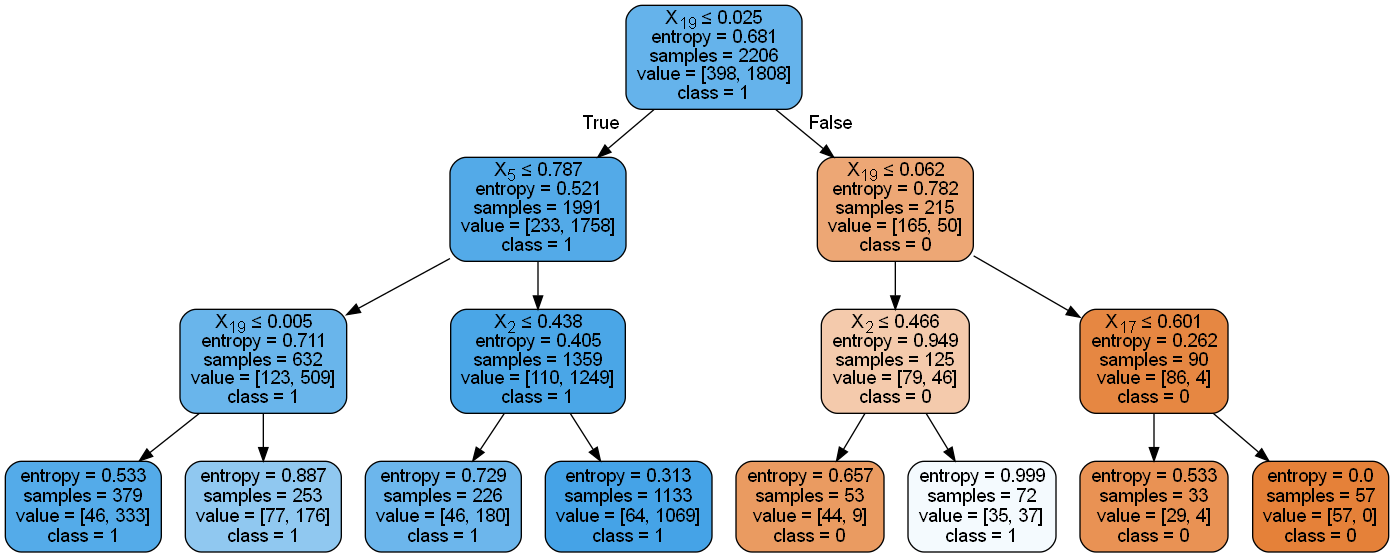

In [105]:
# What the Basic Decision Tree Model Looks Like
dot_data = StringIO()
export_graphviz(DTree_model, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('decision-tree-election.png')
Image(graph.create_png())

### Cross-validation and Hyperparameter Optimizations to Finetune the Models

## MODEL SELECTION AND FINDINGS

### References:
- https://www.analyticsvidhya.com/blog/2017/09/understaing-support-vector-machine-example-code/
- https://towardsdatascience.com/hyperparameter-optimization-with-scikit-learn-scikit-opt-and-keras-f13367f3e796

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=5e29d49d-e8a5-4b79-a7a8-5fff20f26b9d' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>